# Multi-Class Deep Learning Model for Forest Cover Type Using TensorFlow Take 7
### David Lowe
### May 26, 2020

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery. [https://machinelearningmastery.com/]

SUMMARY: The purpose of this project is to construct a predictive model using various machine learning algorithms and to document the end-to-end steps using a template. The Forest Cover Type dataset is a multi-class classification situation where we are trying to predict one of several (more than two) possible outcomes.

INTRODUCTION: This experiment tries to predict forest cover type from cartographic variables only. This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

The actual forest cover type for a given observation (30 x 30-meter cell) was determined from the US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data initially obtained from the US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types).
In iteration Take1, we established the baseline accuracy for comparison with future rounds of modeling.

In iteration Take2, we examined the feature selection technique of attribute importance ranking by using the Gradient Boosting algorithm. By selecting the essential attributes, we decreased the modeling time and still maintained a similar level of accuracy when compared to the baseline model.

In iteration Take3, we examined the feature selection technique of recursive feature elimination (RFE) with the use of the Extra Trees algorithm. By selecting no more than 40 attributes, we maintained a similar level of accuracy when compared to the baseline model.

In iteration Take4, we constructed and tuned an XGBoost machine learning model for this dataset. We also observed the best accuracy result that we could obtain using the XGBoost model with the training dataset from Kaggle. Furthermore, we appled the XGBoost model to Kaggle's test dataset and submitted a list of predictions to Kaggle for evaluation.

In iteration Take5, we constructed several Multilayer Perceptron (MLP) models with one hidden layer. These simple MLP models will serve as the baseline models as we build more complex MLP models in future iterations. Furthermore, we appled the MLP model to Kaggle's test dataset and submitted a list of predictions to Kaggle for evaluation.

In iteration Take6, we constructed several Multilayer Perceptron (MLP) models with two hidden layers. These MLP models will serve as a benchmark as we build more complex MLP models in future iterations. Furthermore, we applied the MLP model to Kaggle's test dataset and submitted a list of predictions to Kaggle for evaluation.

In this Take7 iteration, we will construct several Multilayer Perceptron (MLP) models with three hidden layers. These MLP models will serve as a benchmark as we build more complex MLP models in future iterations. Furthermore, we will apply the MLP model to Kaggle's test dataset and submit a list of predictions to Kaggle for evaluation.

ANALYSIS: Note: Performance measurements for iterations Take1, Take2, and Take3 are available from the Take4 blog posts.

In iteration Take4, the XGBoost algorithm achieved a baseline accuracy performance of 75.29%. After a series of tuning trials, XGBoost turned in an accuracy result of 85.58%. When we applied the tuned XGBoost algorithm to the test dataset, we obtained an accuracy score of only 87.72%, which was even better than the predictions from the training data.

However, when we applied the tuned XGBoost algorithm to the test dataset from Kaggle, we obtained an accuracy score of only 75.45%. Keep in mind that Kaggle uses only 2.6% of the original dataset to predict the remaining 97.5% of test data.

In iteration Take5, all single-layer models achieved an accuracy performance of between 70.6% and 77.8% after 75 epochs using the test dataset. The 36-node model appears to have the highest accuracy with low variance. However, when we applied the single-layer 36-node neural network model to the test dataset from Kaggle, we obtained an accuracy score of only 60.96%.

In iteration Take6, all dual-layer models achieved an accuracy performance of between 75.5% and 80.4% after 75 epochs using the test dataset. The 36/28-node model appears to have the highest accuracy with low variance. However, when we applied the dual-layer 36/28-node neural network model to the test dataset from Kaggle, we obtained an accuracy score of only 65.872%.

In this Take7 iteration, all three-layer models achieved an accuracy performance of between 78.1% and 80.1% after 75 epochs using the test dataset. The 36/28/24-node model appears to have the highest accuracy with low variance.

However, when we applied the dual-layer 36/28/8-node neural network model to the test dataset from Kaggle, we obtained an accuracy score of only 65.744%. We captured additional performance measurements using different model configurations.

Three-Layer 36/28/08-Node MLP Model - Accuracy: 65.744%
Three-Layer 36/28/12-Node MLP Model - Accuracy: 63.707%
Three-Layer 36/28/16-Node MLP Model - Accuracy: 65.485%
Three-Layer 36/28/20-Node MLP Model - Accuracy: 63.663%
Three-Layer 36/28/24-Node MLP Model - Accuracy: 63.455%

CONCLUSION: For this iteration, the baseline model with a dual-layer of 36/28/8 nodes appeared to have yielded the best result. For this dataset, we should consider experimenting with more and different MLP models.

Dataset Used: Forest Cover Type Data Set

Dataset ML Model: Multi-Class classification with numerical attributes

Dataset Reference: https://archive.ics.uci.edu/ml/datasets/Covertype

One source of potential performance benchmarks: https://www.kaggle.com/c/forest-cover-type-prediction/overview

A deep-learning modeling project generally can be broken down into five major tasks:

1. Prepare Environment
2. Load and Prepare Data
3. Define and Train Model
4. Evaluate and Optimize Model
5. Finalize Model and Make Predictions

# Task 1. Prepare Environment

In [1]:
# Retrieve GPU information from Colab
ncpu = !nproc
print("The number of available CPUs is:", ncpu[0])

The number of available CPUs is: 2


In [2]:
# Retrieve GPU configuration information from Colab
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
    print('and then re-execute this cell.')
else:
    print(gpu_info)

Tue Apr 28 15:42:57 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
# Retrieve memory configuration information from Colab
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
    print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
    print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
    print('re-execute this cell.')
else:
    print('You are using a high-RAM runtime!')

Your runtime has 13.7 gigabytes of available RAM

To enable a high-RAM runtime, select the Runtime → "Change runtime type"
menu, and then select High-RAM in the Runtime shape dropdown. Then, 
re-execute this cell.


In [0]:
# Direct Colab to use TensorFlow v2
%tensorflow_version 2.x

In [0]:
# Set the random seed number for reproducible results
seedNum = 888

In [0]:
# Load libraries and packages
import random
random.seed(seedNum)
import numpy as np
np.random.seed(seedNum)
import tensorflow as tf
tf.random.set_seed(seedNum)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Flatten
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.layers import Conv2D
# from tensorflow.keras.layers import MaxPooling2D
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os
import sys
import smtplib
import matplotlib.pyplot as plt
from datetime import datetime
from email.message import EmailMessage
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [7]:
# Begin the timer for the script processing
startTimeScript = datetime.now()

# Set up the verbose flag to print detailed messages for debugging (setting to True will activate)
# verbose = True
# tf.debugging.set_log_device_placement(verbose)

# Set up the number of CPU cores available for multi-thread processing
n_jobs = 2
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Set up the flag to stop sending progress emails (setting to True will send status emails!)
notifyStatus = False

# Set the number of folds for cross validation
n_folds = 5

# Set the flag for splitting the dataset
splitDataset = True
splitPercentage = 0.25

# Set various default Keras modeling parameters
default_loss = 'categorical_crossentropy'
default_metrics = ['accuracy']
default_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
default_kernel_init = tf.keras.initializers.he_uniform(seed=seedNum)
default_epoch = 75
default_batch = 16

Num GPUs Available:  1


In [0]:
# Set up the email notification function
def email_notify(msg_text):
    sender = os.environ.get('MAIL_SENDER')
    receiver = os.environ.get('MAIL_RECEIVER')
    gateway = os.environ.get('SMTP_GATEWAY')
    smtpuser = os.environ.get('SMTP_USERNAME')
    password = os.environ.get('SMTP_PASSWORD')
    if (sender is None) or (receiver is None) or (gateway is None) or (smtpuser is None) or (password is None):
        sys.exit("Incomplete email setup info. Script Processing Aborted!!!")
    msg = EmailMessage()
    msg.set_content(msg_text)
    msg['Subject'] = 'Notification from TensorFlow Multi-Class Classification Script'
    msg['From'] = sender
    msg['To'] = receiver
    server = smtplib.SMTP(gateway, 587)
    server.starttls()
    server.login(smtpuser, password)
    server.send_message(msg)
    server.quit()

In [0]:
# Reset the random number generators
def reset_random(x):
    random.seed(x)
    np.random.seed(x)
    tf.random.set_seed(x)

In [0]:
if notifyStatus: email_notify("Task 1. Prepare Environment completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Task 2. Load and Prepare Data

In [0]:
if notifyStatus: email_notify("Task 2. Load Data has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

## 2.a) Load Dataset

In [12]:
dataset_path = 'https://dainesanalytics.com/datasets/kaggle-forest-cover-type/train.csv'
Xy_original = pd.read_csv(dataset_path, sep=',', header=0, index_col=0)

# Take a peek at the dataframe after the import
Xy_original.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
6,2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
7,2606,45,7,270,5,633,222,225,138,6256,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
8,2605,49,4,234,7,573,222,230,144,6228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
9,2617,45,9,240,56,666,223,221,133,6244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [13]:
Xy_original.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15120 entries, 1 to 15120
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wild

In [14]:
null_counts = Xy_original.isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

In [15]:
print('Total number of NaN in the dataframe: ', Xy_original.isnull().sum().sum())

Total number of NaN in the dataframe:  0


## 2.b) Data Cleaning

In [16]:
# Standardize the class column to the name of targetVar if required
Xy_original = Xy_original.rename(columns={'Cover_Type': 'targetVar'})

# Select only the columns we wish to use for plotting graphs
non_categorical_cols = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology',
                        'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways',
                        'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']

# Convert columns from one data type to another
Xy_original[non_categorical_cols] = Xy_original[non_categorical_cols].astype(float)

# Take a peek at the dataframe after the cleaning
Xy_original.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,targetVar
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
3,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
5,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
6,2579.0,132.0,6.0,300.0,-15.0,67.0,230.0,237.0,140.0,6031.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
7,2606.0,45.0,7.0,270.0,5.0,633.0,222.0,225.0,138.0,6256.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
8,2605.0,49.0,4.0,234.0,7.0,573.0,222.0,230.0,144.0,6228.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
9,2617.0,45.0,9.0,240.0,56.0,666.0,223.0,221.0,133.0,6244.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [17]:
Xy_original.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15120 entries, 1 to 15120
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Elevation                           15120 non-null  float64
 1   Aspect                              15120 non-null  float64
 2   Slope                               15120 non-null  float64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  float64
 4   Vertical_Distance_To_Hydrology      15120 non-null  float64
 5   Horizontal_Distance_To_Roadways     15120 non-null  float64
 6   Hillshade_9am                       15120 non-null  float64
 7   Hillshade_Noon                      15120 non-null  float64
 8   Hillshade_3pm                       15120 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  float64
 10  Wilderness_Area1                    15120 non-null  int64  
 11  Wilderness_Area2                    15120

In [18]:
null_counts = Xy_original.isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

In [19]:
print('Total number of NaN in the dataframe: ', Xy_original.isnull().sum().sum())

Total number of NaN in the dataframe:  0


## 2.c) Feature Scaling and Pre-processing

In [0]:
# Use variable totCol to hold the number of columns in the dataframe
totCol = len(Xy_original.columns)

# Set up variable totAttr for the total number of attribute columns
totAttr = totCol-1

# targetCol variable indicates the column location of the target/class variable
# If the first column, set targetCol to 1. If the last column, set targetCol to totCol
# If (targetCol <> 1) and (targetCol <> totCol), be aware when slicing up the dataframes for visualization
targetCol = totCol

In [21]:
# We create attribute-only and target-only datasets (X_original and y_original)
# for various visualization and cleaning/transformation operations

if targetCol == totCol:
    X_original = Xy_original.iloc[:,0:totAttr]
    y_original = Xy_original.iloc[:,totAttr]
else:
    X_original = Xy_original.iloc[:,1:totCol]
    y_original = Xy_original.iloc[:,0]

print("Xy_original.shape: {} X_original.shape: {} y_original.shape: {}".format(Xy_original.shape, X_original.shape, y_original.shape))

Xy_original.shape: (15120, 55) X_original.shape: (15120, 54) y_original.shape: (15120,)


In [0]:
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 4
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1
    
# Set figure width to display the data visualization plots
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = dispCol*4
fig_size[1] = dispRow*4
plt.rcParams["figure.figsize"] = fig_size

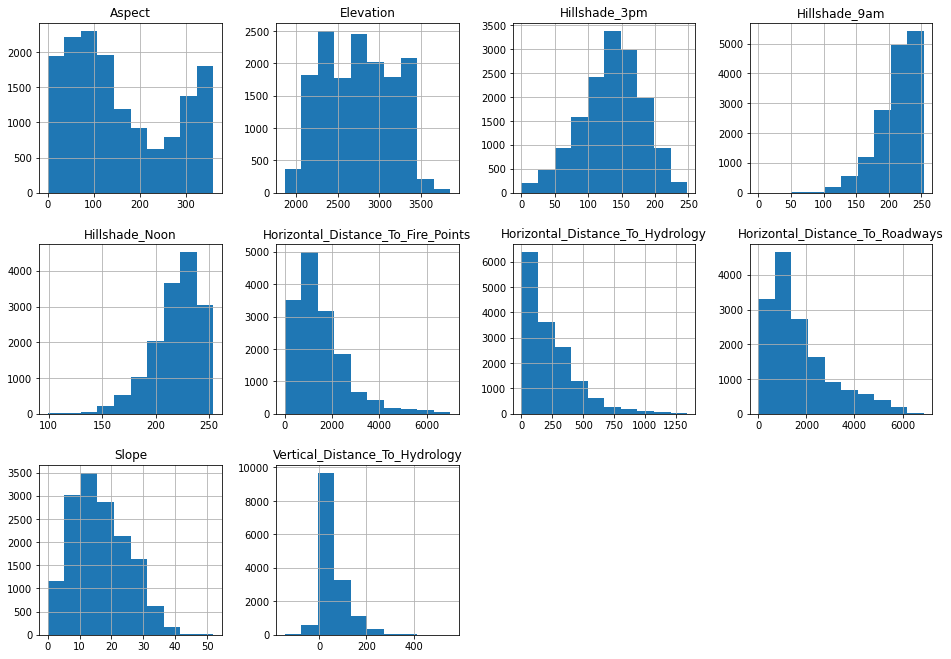

In [23]:
# Histograms for each attribute before pre-processing
X_original[non_categorical_cols].hist(layout=(dispRow,dispCol))
plt.show()

In [24]:
# Apply feature scaling and transformation
scaler = preprocessing.MinMaxScaler()
X_original[non_categorical_cols] = scaler.fit_transform(X_original[non_categorical_cols])

X_original.head(-10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.369084,0.141667,0.057692,0.192107,0.208571,0.074020,0.870079,0.858065,0.596774,0.897898,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.366062,0.155556,0.038462,0.157856,0.200000,0.056604,0.866142,0.877419,0.608871,0.890176,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0.473817,0.386111,0.173077,0.199553,0.301429,0.461538,0.921260,0.896774,0.544355,0.875304,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.464250,0.430556,0.346154,0.180194,0.377143,0.448476,0.937008,0.896774,0.491935,0.888174,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0.368580,0.125000,0.038462,0.113924,0.207143,0.056749,0.866142,0.870968,0.604839,0.882597,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15106,0.310675,0.027778,0.403846,0.111690,0.262857,0.088099,0.759843,0.612903,0.536290,0.205348,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15107,0.399295,0.183333,0.211538,0.390171,0.258571,0.128157,0.909449,0.761290,0.471774,0.155012,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15108,0.371098,0.813889,0.269231,0.245719,0.208571,0.117852,0.704724,0.883871,0.794355,0.167310,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


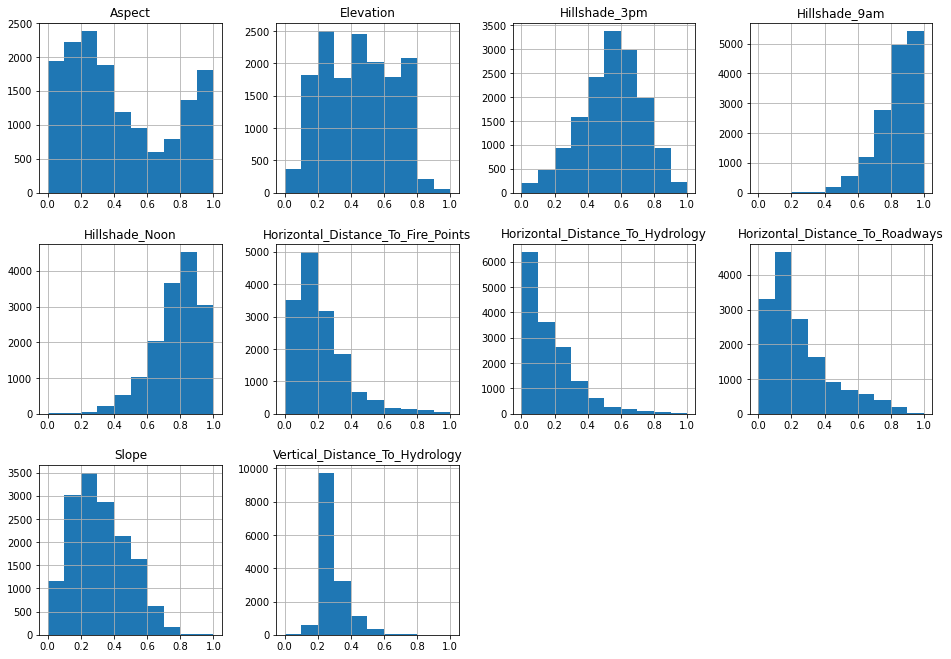

In [25]:
# Histograms for each attribute after pre-processing
X_original[non_categorical_cols].hist(layout=(dispRow,dispCol))
plt.show()

## 2.d) Splitting Data into Training and Test Sets

In [26]:
# Encode class values as integers and perform one-hot-encoding
# y_encoded = y_original.to_numpy()
encoder = preprocessing.LabelEncoder()
encoder.fit(y_original)
y_transformed = encoder.transform(y_original)
y_encoded = tf.keras.utils.to_categorical(y_transformed)
print(y_encoded)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [27]:
X_encoded = X_original.to_numpy()
if splitDataset:
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=splitPercentage, 
                                                        stratify=y_encoded, random_state=seedNum)
else:
    X_train, y_train = X_encoded, y_encoded
    X_test, y_test = X_encoded, y_encoded
print("X_train.shape: {} X_train.type: {}".format(X_train.shape, type(X_train)))
print("y_train.shape: {} y_train.type: {}".format(y_train.shape, type(y_train)))
print("X_test.shape: {} X_test.type: {}".format(X_test.shape, type(X_test)))
print("y_test.shape: {} y_test.type: {}".format(y_test.shape, type(y_test)))

X_train.shape: (11340, 54) X_train.type: <class 'numpy.ndarray'>
y_train.shape: (11340, 7) y_train.type: <class 'numpy.ndarray'>
X_test.shape: (3780, 54) X_test.type: <class 'numpy.ndarray'>
y_test.shape: (3780, 7) y_test.type: <class 'numpy.ndarray'>


In [0]:
if notifyStatus: email_notify("Task 2. Load Data completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Task 3. Define and Train Model

In [0]:
if notifyStatus: email_notify("Task 3. Define and Fit Model has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [0]:
# Define the baseline model for benchmarking
def create_default_model():
    default_model = Sequential()
    default_model.add(Dense(36, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(28, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(8, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(7, activation='softmax', kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer, metrics=default_metrics)
    return default_model

In [31]:
startTimeModule = datetime.now()

# Initialize and fit the model
reset_random(seedNum)
baseline_model = create_default_model()
print(baseline_model.get_config())
baseline_hist = baseline_model.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch,
                                   validation_data=(X_test, y_test), verbose=0)
print('The maximum accuracy for the training dataset:', max(baseline_hist.history['accuracy']))
print('The accuracy at the last epoch for the training dataset:', baseline_hist.history['accuracy'][-1])
print('The maximum accuracy for the test dataset:', max(baseline_hist.history['val_accuracy']))
print('The accuracy at the last epoch for the test dataset:', baseline_hist.history['val_accuracy'][-1])
print('Total time for model fitting:', (datetime.now() - startTimeModule))

{'name': 'sequential', 'layers': [{'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'batch_input_shape': (None, 54), 'dtype': 'float32', 'units': 36, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 28, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': 

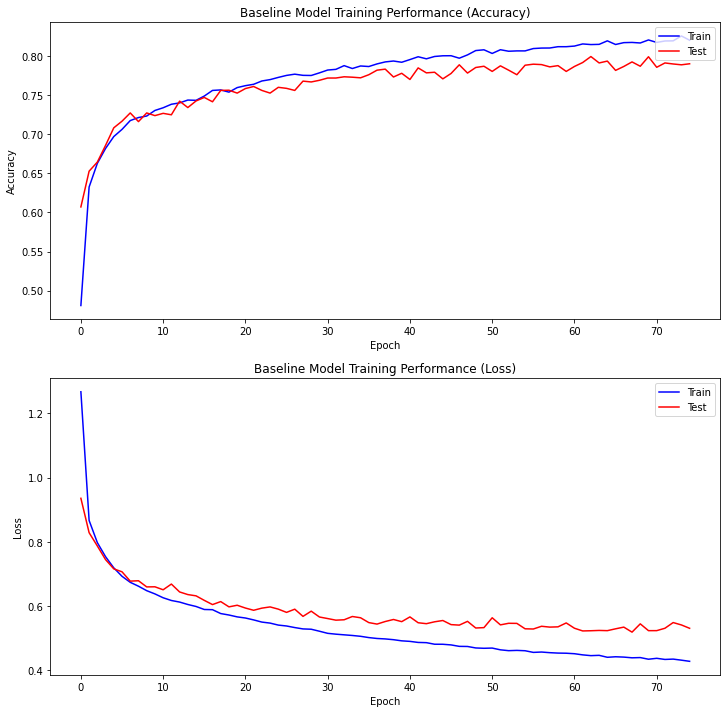

In [32]:
# Summarize model training hisotry
fig, axs = plt.subplots(2, 1, figsize=(12,12))
plt.subplot(211)
plt.plot(baseline_hist.history['accuracy'], color='blue', label='train')
plt.plot(baseline_hist.history['val_accuracy'], color='red', label='test')
plt.title('Baseline Model Training Performance (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.subplot(212)
plt.plot(baseline_hist.history['loss'], color='blue', label='train')
plt.plot(baseline_hist.history['val_loss'], color='red', label='test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
if notifyStatus: email_notify("Task 3. Define and Fit Model completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Task 4. Explore Various One-Layer Models

In [0]:
if notifyStatus: email_notify("Task 4. Explore Various One-Layer Models has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [35]:
# Define MLP model 7A
def create_model_7A():
    default_model = Sequential()
    default_model.add(Dense(36, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(28, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(12, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(7, activation='softmax', kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer, metrics=default_metrics)
    return default_model

# Initialize and fit the model
reset_random(seedNum)
baseline_model_7A = create_model_7A()
print(baseline_model_7A.get_config())
baseline_hist = baseline_model_7A.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, validation_data=(X_test, y_test), verbose=0)
print('The maximum accuracy for the training dataset:', max(baseline_hist.history['accuracy']))
print('The accuracy at the last epoch for the training dataset:', baseline_hist.history['accuracy'][-1])
print('The maximum accuracy for the test dataset:', max(baseline_hist.history['val_accuracy']))
print('The accuracy at the last epoch for the test dataset:', baseline_hist.history['val_accuracy'][-1])
print('Total time for model fitting:', (datetime.now() - startTimeModule))

{'name': 'sequential_1', 'layers': [{'class_name': 'Dense', 'config': {'name': 'dense_4', 'trainable': True, 'batch_input_shape': (None, 54), 'dtype': 'float32', 'units': 36, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_5', 'trainable': True, 'dtype': 'float32', 'units': 28, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constrain

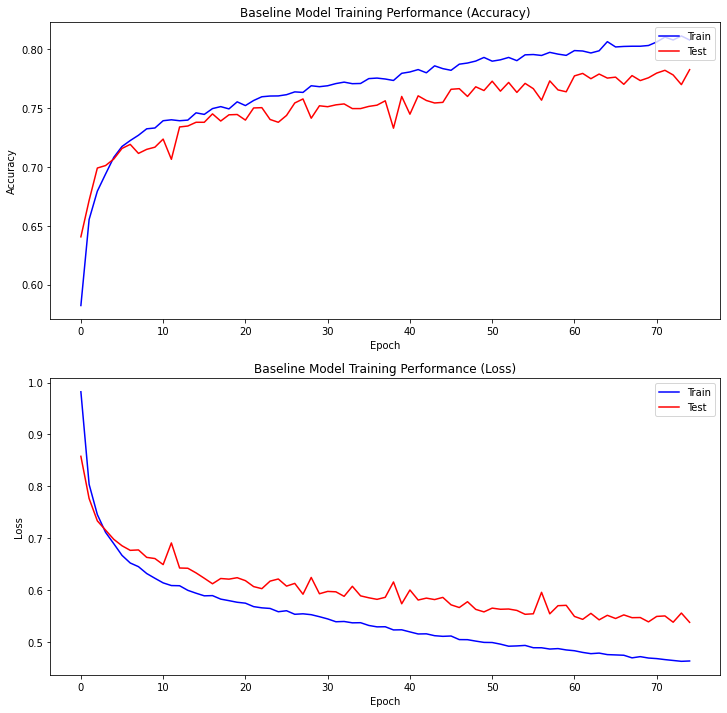

In [36]:
# Summarize model training hisotry
fig, axs = plt.subplots(2, 1, figsize=(12,12))
plt.subplot(211)
plt.plot(baseline_hist.history['accuracy'], color='blue', label='train')
plt.plot(baseline_hist.history['val_accuracy'], color='red', label='test')
plt.title('Baseline Model Training Performance (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.subplot(212)
plt.plot(baseline_hist.history['loss'], color='blue', label='train')
plt.plot(baseline_hist.history['val_loss'], color='red', label='test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [37]:
# Define MLP model 7B
def create_model_7B():
    default_model = Sequential()
    default_model.add(Dense(36, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(28, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(16, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(7, activation='softmax', kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer, metrics=default_metrics)
    return default_model

# Initialize and fit the model
reset_random(seedNum)
baseline_model_7B = create_model_7B()
print(baseline_model_7B.get_config())
baseline_hist = baseline_model_7B.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, validation_data=(X_test, y_test), verbose=0)
print('The maximum accuracy for the training dataset:', max(baseline_hist.history['accuracy']))
print('The accuracy at the last epoch for the training dataset:', baseline_hist.history['accuracy'][-1])
print('The maximum accuracy for the test dataset:', max(baseline_hist.history['val_accuracy']))
print('The accuracy at the last epoch for the test dataset:', baseline_hist.history['val_accuracy'][-1])
print('Total time for model fitting:', (datetime.now() - startTimeModule))

{'name': 'sequential_2', 'layers': [{'class_name': 'Dense', 'config': {'name': 'dense_8', 'trainable': True, 'batch_input_shape': (None, 54), 'dtype': 'float32', 'units': 36, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_9', 'trainable': True, 'dtype': 'float32', 'units': 28, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constrain

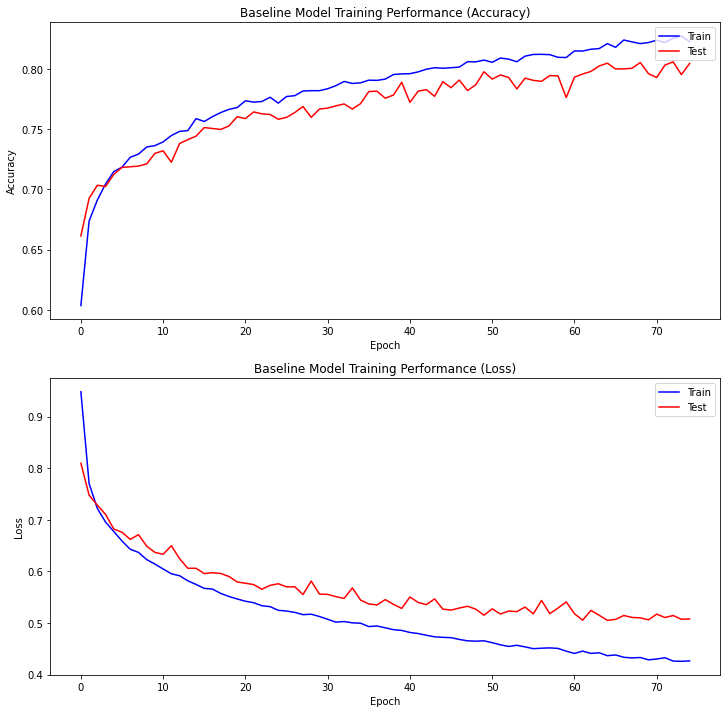

In [38]:
# Summarize model training hisotry
fig, axs = plt.subplots(2, 1, figsize=(12,12))
plt.subplot(211)
plt.plot(baseline_hist.history['accuracy'], color='blue', label='train')
plt.plot(baseline_hist.history['val_accuracy'], color='red', label='test')
plt.title('Baseline Model Training Performance (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.subplot(212)
plt.plot(baseline_hist.history['loss'], color='blue', label='train')
plt.plot(baseline_hist.history['val_loss'], color='red', label='test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [39]:
# Define MLP model 7C
def create_model_7C():
    default_model = Sequential()
    default_model.add(Dense(36, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(28, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(20, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(7, activation='softmax', kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer, metrics=default_metrics)
    return default_model

# Initialize and fit the model
reset_random(seedNum)
baseline_model_7C = create_model_7C()
print(baseline_model_7C.get_config())
baseline_hist = baseline_model_7C.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, validation_data=(X_test, y_test), verbose=0)
print('The maximum accuracy for the training dataset:', max(baseline_hist.history['accuracy']))
print('The accuracy at the last epoch for the training dataset:', baseline_hist.history['accuracy'][-1])
print('The maximum accuracy for the test dataset:', max(baseline_hist.history['val_accuracy']))
print('The accuracy at the last epoch for the test dataset:', baseline_hist.history['val_accuracy'][-1])
print('Total time for model fitting:', (datetime.now() - startTimeModule))

{'name': 'sequential_3', 'layers': [{'class_name': 'Dense', 'config': {'name': 'dense_12', 'trainable': True, 'batch_input_shape': (None, 54), 'dtype': 'float32', 'units': 36, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_13', 'trainable': True, 'dtype': 'float32', 'units': 28, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constra

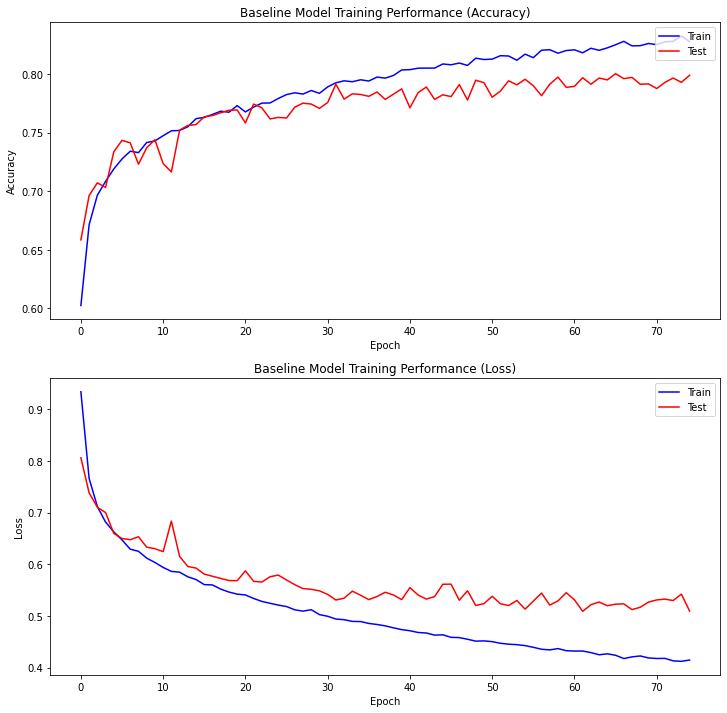

In [40]:
# Summarize model training hisotry
fig, axs = plt.subplots(2, 1, figsize=(12,12))
plt.subplot(211)
plt.plot(baseline_hist.history['accuracy'], color='blue', label='train')
plt.plot(baseline_hist.history['val_accuracy'], color='red', label='test')
plt.title('Baseline Model Training Performance (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.subplot(212)
plt.plot(baseline_hist.history['loss'], color='blue', label='train')
plt.plot(baseline_hist.history['val_loss'], color='red', label='test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [41]:
# Define MLP model 7D
def create_model_7D():
    default_model = Sequential()
    default_model.add(Dense(36, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(28, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(24, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(7, activation='softmax', kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer, metrics=default_metrics)
    return default_model

# Initialize and fit the model
reset_random(seedNum)
baseline_model_7D = create_model_7D()
print(baseline_model_7D.get_config())
baseline_hist = baseline_model_7D.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, validation_data=(X_test, y_test), verbose=0)
print('The maximum accuracy for the training dataset:', max(baseline_hist.history['accuracy']))
print('The accuracy at the last epoch for the training dataset:', baseline_hist.history['accuracy'][-1])
print('The maximum accuracy for the test dataset:', max(baseline_hist.history['val_accuracy']))
print('The accuracy at the last epoch for the test dataset:', baseline_hist.history['val_accuracy'][-1])
print('Total time for model fitting:', (datetime.now() - startTimeModule))

{'name': 'sequential_4', 'layers': [{'class_name': 'Dense', 'config': {'name': 'dense_16', 'trainable': True, 'batch_input_shape': (None, 54), 'dtype': 'float32', 'units': 36, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_17', 'trainable': True, 'dtype': 'float32', 'units': 28, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constra

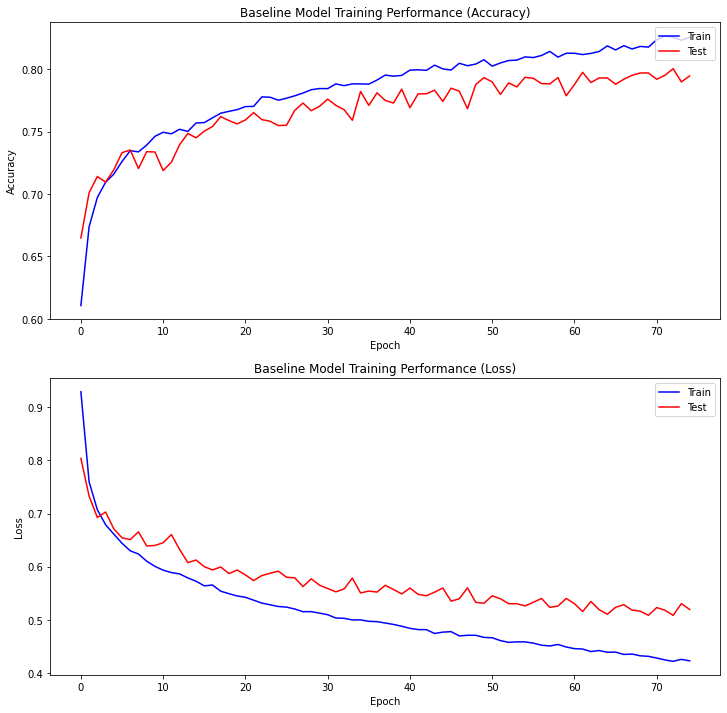

In [42]:
# Summarize model training hisotry
fig, axs = plt.subplots(2, 1, figsize=(12,12))
plt.subplot(211)
plt.plot(baseline_hist.history['accuracy'], color='blue', label='train')
plt.plot(baseline_hist.history['val_accuracy'], color='red', label='test')
plt.title('Baseline Model Training Performance (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.subplot(212)
plt.plot(baseline_hist.history['loss'], color='blue', label='train')
plt.plot(baseline_hist.history['val_loss'], color='red', label='test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
if notifyStatus: email_notify("Task 4. Explore Various One-Layer Models completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Task 5. Finalize Model and Make Predictions

In [0]:
if notifyStatus: email_notify("Task 5. Finalize Model and Make Predictions has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [45]:
# Display a summary of the final model
final_model = baseline_model
print(final_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 36)                1980      
_________________________________________________________________
dense_1 (Dense)              (None, 28)                1036      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 232       
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 63        
Total params: 3,311
Trainable params: 3,311
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
# Display the configuration of the final model
print(final_model.get_config())

{'name': 'sequential', 'layers': [{'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'batch_input_shape': (None, 54), 'dtype': 'float32', 'units': 36, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 28, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': 

In [47]:
dataset_path = 'https://dainesanalytics.com/datasets/kaggle-forest-cover-type/test.csv'
X_kaggle_data = pd.read_csv(dataset_path, sep=',', header=0, index_col=None)

# Take a peek at the dataframe after import
X_kaggle_data.head(10)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,6675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,6344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,6374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,6404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,15126,2699,21,18,30,3,2890,206,200,127,6434,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,15127,2699,15,17,30,6,2860,202,202,133,6464,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,15128,2696,10,16,30,6,2830,202,207,140,6494,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,15129,2696,17,13,30,6,2770,208,211,138,6553,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,15130,2693,14,15,30,7,2741,205,209,138,6583,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [48]:
y_submission_kaggle = pd.DataFrame(columns=['Id', 'Cover_Type'])
y_submission_kaggle['Id'] = X_kaggle_data['Id']
y_submission_kaggle.head()

,Id,Cover_Type
0,15121,NaN
1,15122,NaN
2,15123,NaN
3,15124,NaN
4,15125,NaN


In [49]:
# Apply the same feature-scaling steps to the test data
X_kaggle_data.drop(columns={'Id'}, inplace=True)
X_kaggle_data[non_categorical_cols] = scaler.fit_transform(X_kaggle_data[non_categorical_cols])
X_kaggle_data.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0.410705,0.983333,0.212121,0.000000,0.223514,0.377125,0.771654,0.842520,0.614173,0.926391,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0.412206,0.000000,0.196970,0.000000,0.223514,0.372910,0.791339,0.850394,0.598425,0.930573,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.427214,0.044444,0.227273,0.000000,0.223514,0.418716,0.811024,0.818898,0.539370,0.884428,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0.425213,0.066667,0.257576,0.000000,0.223514,0.414500,0.818898,0.791339,0.492126,0.888610,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.423712,0.080556,0.287879,0.000000,0.223514,0.410285,0.826772,0.767717,0.452756,0.892792,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0.420210,0.058333,0.272727,0.021475,0.227390,0.406070,0.811024,0.787402,0.500000,0.896975,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0.420210,0.041667,0.257576,0.021475,0.231266,0.401855,0.795276,0.795276,0.523622,0.901157,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,0.418709,0.027778,0.242424,0.021475,0.231266,0.397639,0.795276,0.814961,0.551181,0.905339,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0.418709,0.047222,0.196970,0.021475,0.231266,0.389209,0.818898,0.830709,0.543307,0.913565,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,0.417209,0.038889,0.227273,0.021475,0.232558,0.385134,0.807087,0.822835,0.543307,0.917747,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [50]:
# Convert the dataframe to numpy array before the final prediction step
X_test_kaggle = X_kaggle_data.to_numpy()
print("X_test_kaggle.shape: {}".format(X_test_kaggle.shape))

X_test_kaggle.shape: (565892, 54)


In [51]:
predictions_kaggle = encoder.inverse_transform(np.argmax(final_model.predict(X_test_kaggle), axis=-1))
y_submission_kaggle['Cover_Type'] = predictions_kaggle
print("y_submission_kaggle.shape: {}".format(y_submission_kaggle.shape))

y_submission_kaggle.shape: (565892, 2)


In [52]:
y_submission_kaggle.groupby('Cover_Type').size()

Cover_Type
1    200599
2    212196
3     33185
4      2426
5     53471
6     25268
7     38747
dtype: int64

In [53]:
# Mount Google Drive locally for storing files
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [54]:
gdrivePrefix = '/content/gdrive/My Drive/Colab_Downloads/'
submission_file = y_submission_kaggle.to_csv(header=True, index=False)
filename = gdrivePrefix + 'submission_' + datetime.now().strftime('%Y%m%d-%H%M') + '.csv'
with open(filename, 'w') as f:
    f.write(submission_file)
    print('Completed writing output file: ' + filename)

Completed writing output file: /content/gdrive/My Drive/Colab_Downloads/submission_20200428-1551.csv


In [0]:
if notifyStatus: email_notify("Task 5. Finalize Model and Make Predictions completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [56]:
print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 0:08:27.544793
